# Machine Learning 7주차

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

data <- sample data, Numpy array 
target <- Label data, Numpy array

target_names <- Label data name 
feature_names <- Feature data name

In [2]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df['target_name'] = iris['target_names'][iris['target'][:]]

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


array([[<AxesSubplot: title={'center': 'sepal length (cm)'}, xlabel='[target_name]'>,
        <AxesSubplot: title={'center': 'sepal width (cm)'}, xlabel='[target_name]'>],
       [<AxesSubplot: title={'center': 'petal length (cm)'}, xlabel='[target_name]'>,
        <AxesSubplot: title={'center': 'petal width (cm)'}, xlabel='[target_name]'>]],
      dtype=object)

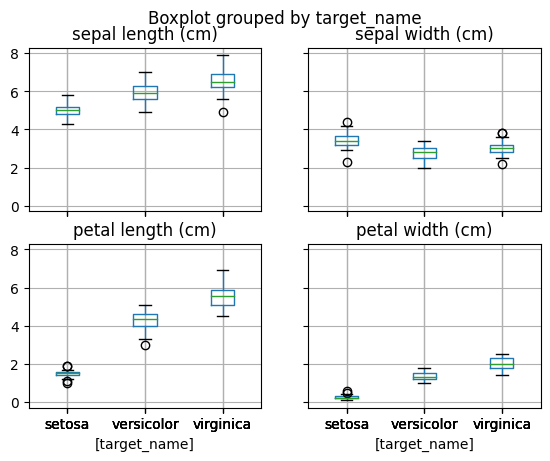

In [8]:
df.boxplot(column=['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], by=['target_name'])

In [13]:
iris = df.rename(columns={ 'sepal length (cm)':'sl',
                            'sepal width (cm)':'sw',
                            'petal length (cm)':'pl',
                            'petal width (cm)':'pw',
                            'target_name':'class'})

In [14]:
iris

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


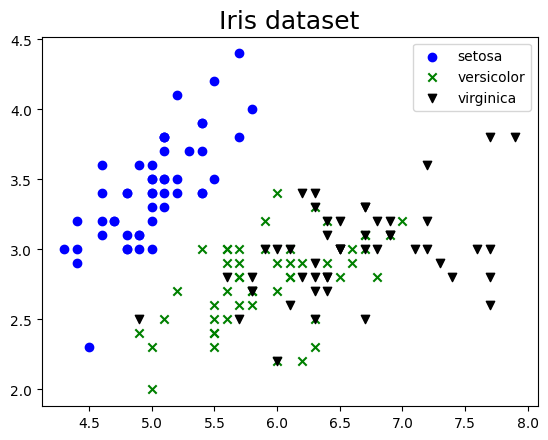

In [15]:
setosa = iris[iris['class'] == 'setosa']
versicolor = iris[iris['class'] == 'versicolor']
virginica = iris[iris['class'] == 'virginica']

o = plt.scatter(setosa['sl'], setosa['sw'], marker='o', color='b')
x = plt.scatter(versicolor['sl'],versicolor['sw'],marker='x',color='g')
v = plt.scatter(virginica['sl'],virginica['sw'],marker='v',color='k')

plt.legend((o, x, v), ('setosa', 'versicolor', 'virginica'), loc='upper right')
plt.title("Iris dataset", fontsize=18)
plt.show()

In [16]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = (iris['target'] == 2).astype(np.float64) # Iris-Virginica
svm_clf = Pipeline([
    ('scaller', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaller', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [21]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

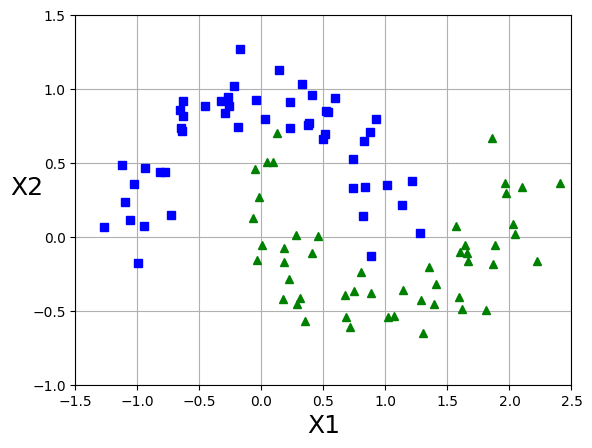

In [26]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.axis([-1.5,2.5,-1,1.5])
plt.grid(True, which='both')
plt.xlabel('X1',fontsize=18)
plt.ylabel('X2',fontsize=18, rotation=0)
plt.show()

In [29]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge',max_iter=2000, random_state=42))
])
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=2000,
                           random_state=42))])

In [32]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel="poly",degree=3,coef0=1,C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [34]:
from sklearn.svm import SVC
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [36]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
X = iris.data[:,2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

plot.tree (tree_clf, feature_names=["pental length (cm)", "pental width (cm)"],
    class_names=iris.target_names, rounded=True, filled=True)

NameError: name 'plot' is not defined